# Simulating a game of Risk

## Rules of Risk

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

1. The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
 - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
 - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)


## Import necessary libraries

This cell imports the required libraries.

- numpy for dice rolls.
- matplotlib.pyplot is used for creating the plot of the results.

In [1071]:
import numpy as np
import matplotlib.pyplot as plt

## Important Factors:

1. Rolling of the Dice

2. Individual battles

3. Multiple battles

4. Full Battles

### Define Dice Rolling Function

This function simulates rolling dice:

num_dice: Number of dice to roll.
- The rolls are generated using np.random.randint(1, 7), which creates random integers between 1 (inclusive) and 7 (exclusive).
- The rolls are sorted in descending order using np.sort(rolls)[::-1] to make comparisons easier during battles.

In [1072]:
def roll_dice(num_dice):
    rolls = np.random.randint(1, 7, (num_dice))
    #1,7 is used as np.random.randint function uses a half-open interval
    #It includes the low value and excludes the high value.

    sorted_rolls = np.sort(rolls)[::-1]  # Sort rolls in descending order
    return sorted_rolls

num_dice = 5
sorted_rolls = roll_dice(num_dice)

print(f"Dice rolls (sorted in descending order): {sorted_rolls}")

Dice rolls (sorted in descending order): [6 4 3 2 2]


### Simulate One Battle

This function simulates one round of battle:

- The attacker rolls 3 dice, and the defender rolls 2 dice.
- The dice rolls are compared pairwise, starting from the highest rolls.
- If the attacker’s roll is higher, the defender loses a troop; otherwise, the attacker loses a troop.
- The function determines the winner based on the results and returns relevant details, including the dice rolls.

In [1073]:
def simulate_battle():
    #Simulates one battle round between 3 attackers and 2 defenders.
    # Roll dice for attacker and defender
    attacker_rolls = roll_dice(3)
    defender_rolls = roll_dice(2)

    # Initialize victory counts
    attacker_victories = 0
    defender_victories = 0

    # Compare the top dice rolls
    for i in range(min(len(attacker_rolls), len(defender_rolls))):
        if attacker_rolls[i] > defender_rolls[i]:
            attacker_victories += 1
        else:
            defender_victories += 1

    # Determine the winner
    if attacker_victories > defender_victories:
        winner = "Attacker"
    elif defender_victories > attacker_victories:
        winner = "Defender"
    else:
        winner = "Tie"

    return attacker_victories, defender_victories, winner, attacker_rolls, defender_rolls

attacker_victories, defender_victories, winner, attacker_rolls, defender_rolls = simulate_battle()

print(f"Attacker Victories: {attacker_victories}")
print(f"Defender Victories: {defender_victories}")

if winner == "Attacker":
    print("Round Winner: The Attacker!")
elif winner == "Defender":
    print("Round Winner: The Defender!")
else:
    print("Round Result: It's a tie!")

Attacker Victories: 0
Defender Victories: 2
Round Winner: The Defender!


### Simulate Multiple Battles

This function simulates multiple rounds of battle:

- It runs the simulate_battle() function num_battles "x" times.
- It keeps track of how many battles are won by the attacker, the defender, and how many ended in a tie.

Here, the simulation is executed for 1000 rounds using the simulate_multiple_battles() function.
The results (attacker_wins, defender_wins, and ties) are stored.

In [1074]:
def simulate_multiple_battles(num_battles):
    attacker_wins = 0
    defender_wins = 0
    ties = 0

    for _ in range(num_battles):
        _, _, winner, _, _ = simulate_battle()
        if winner == "Attacker":
            attacker_wins += 1
        elif winner == "Defender":
            defender_wins += 1
        else:
            ties += 1

    return attacker_wins, defender_wins, ties

# Input: Number of battles to simulate
num_battles = 1000

# Simulate the battles
attacker_wins, defender_wins, ties = simulate_multiple_battles(num_battles)

# Output results
print(f"Results after simulating {num_battles} battles:")
print(f"Attacker Wins: {attacker_wins}")
print(f"Defender Wins: {defender_wins}")
print(f"Ties: {ties}")


Results after simulating 1000 battles:
Attacker Wins: 374
Defender Wins: 285
Ties: 341


#### Plot Simulation

This cell creates a bar chart to visualize the simulation results:

- The plt.bar() function creates bars for the three categories: Attacker Wins, Defender Wins, and Ties.
- The plt.text() function adds labels on top of each bar to show the exact count of each category.

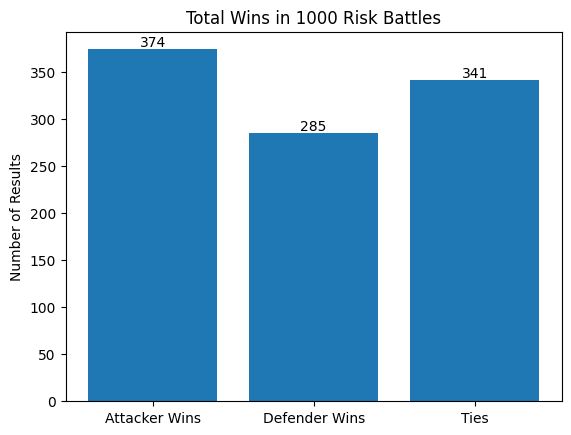

In [1075]:
# Plotting the results
bars = plt.bar(['Attacker Wins', 'Defender Wins', 'Ties'],
               [attacker_wins, defender_wins, ties])
plt.title('Total Wins in 1000 Risk Battles')
plt.ylabel('Number of Results')

# Adding values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

### Full Battle Simulation with Plot

This function simulates the entire battle, keeping track of troop counts for both armies over all rounds until one side is eliminated. The winner is determined based on which army has remaining troops.



In [1076]:
def roll_dice(num_dice):
    """Rolls a specified number of dice and returns the sorted results in descending order."""
    rolls = np.random.randint(1, 7, num_dice)
    sorted_rolls = np.sort(rolls)[::-1]  # Sort rolls in descending order
    return sorted_rolls

def simulate_battle_round(attackers, defenders):
    """Simulates a single battle round between attackers and defenders."""
    # Determine the number of dice each side rolls
    attacker_dice = min(attackers, 3)
    defender_dice = min(defenders, 2)

    # Roll dice for both sides
    attacker_rolls = roll_dice(attacker_dice)
    defender_rolls = roll_dice(defender_dice)

    # Initialize troop losses
    attacker_losses = 0
    defender_losses = 0

    # Compare dice rolls
    for i in range(min(attacker_dice, defender_dice)):
        if attacker_rolls[i] > defender_rolls[i]:
            defender_losses += 1
        else:
            attacker_losses += 1

    return attacker_losses, defender_losses

def simulate_full_battle(attackers, defenders):
    """Simulates a full battle until one side is wiped out."""
    attacker_sizes = [attackers]
    defender_sizes = [defenders]

    while attackers > 0 and defenders > 0:
        # Simulate a single round
        attacker_losses, defender_losses = simulate_battle_round(attackers, defenders)

        # Update troop counts
        attackers -= attacker_losses
        defenders -= defender_losses

        # Record the current sizes of both armies
        attacker_sizes.append(attackers)
        defender_sizes.append(defenders)

    # Determine the winner
    winner = "Attackers" if attackers > 0 else "Defenders"
    return attacker_sizes, defender_sizes, winner

#### Inputs and Simulation

Here, the initial troop sizes for attackers and defenders are defined. The simulation is run using the simulate_full_battle function.



In [1077]:
# Input parameters
initial_attackers = 30  # Number of attacking troops
initial_defenders = 20  # Number of defending troops

# Simulate the full battle
attacker_sizes, defender_sizes, winner = simulate_full_battle(initial_attackers, initial_defenders)

if winner == "Attackers":
    print(f"The winner is the attacker with {attacker_sizes[-1]} troops remaining!")
else:
    print(f"The winner is the defender with {defender_sizes[-1]} troops remaining!")


The winner is the attacker with 10 troops remaining!


#### Plotting the Results

This cell generates a plot showing how the sizes of the attacking and defending armies change over the course of the battle. The winner is annotated at the end.

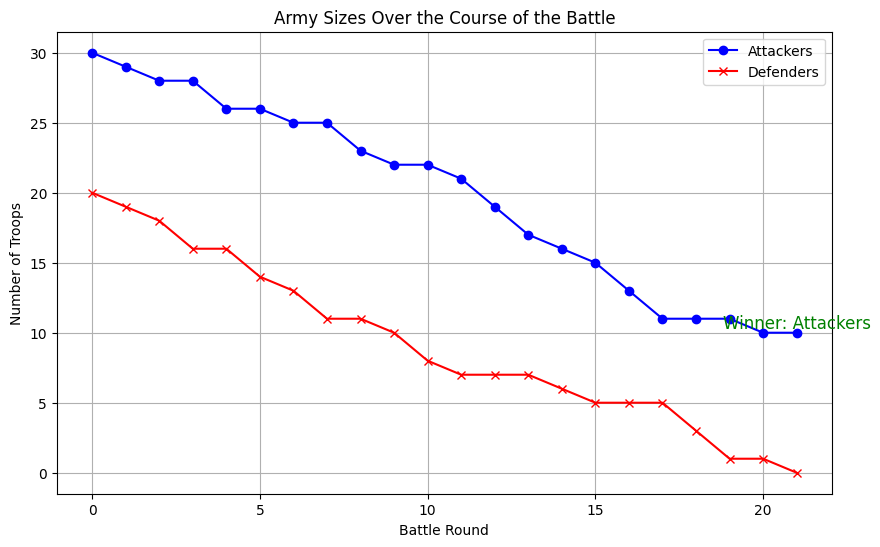

In [1078]:

# Plot the results
plt.figure(figsize=(10, 6))
rounds = range(len(attacker_sizes))
plt.plot(rounds, attacker_sizes, label='Attackers', color='blue', marker='o')
plt.plot(rounds, defender_sizes, label='Defenders', color='red', marker='x')
plt.title('Army Sizes Over the Course of the Battle')
plt.xlabel('Battle Round')
plt.ylabel('Number of Troops')
plt.legend()
plt.grid(True)

# Annotate the winner
plt.text(len(rounds) - 1, attacker_sizes[-1], f"Winner: {winner}", 
         ha='center', va='bottom', fontsize=12, color='green')

plt.show()